# IMDS Workshop 7 
### *By Jeffrey Giansiracusa - Michaelmas*

---

This worksheet covers the content of lectures:

    7.1 Linear transformations
    7.2 Anatomy of a transformation
    7.3 Solving linear equations
    7.4 Inverses of linear transformations and matrices
    7.5 Determinants
    
Key concepts to learn:
    
* What is a linear transformation?
* Linear transformations = matrices
* Columns of a matrix tell you what it does to the standard basis vectors
* Domain and range of linear transformations
* Composition of linear transformations = matrix multiplication
* Rotations
* Shears
* Orthogonal transformations (made from rotations and reflections)
* How the determinant of a matrix tells you whether or not the matrix is invertible.



# Initialization code to run before you start your work

Click on the cell below and then type Shift-Return to execute it.

In [3]:
import numpy as np
import math

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

    
# Input is a list of 2d vectors to be plotted.
def Plot2dVectors(list_of_endpoints):   
    p = figure(width=400, height=400, title="Vectors!")
    for vect in list_of_endpoints:
        xcoords = [0,vect[0]]
        ycoords = [0,vect[1]]
        p.line(xcoords, ycoords, line_width=2)
        p.circle([vect[0]], [vect[1]], color='red', size=2)
    show(p)

# Input is a list of 2d vectors as (x,y) coordinates of points to be plotted.
def Plot2dDots(list_of_points):   
    TOOLTIPS = [("(x,y)", "($x, $y)")]
    p = figure(width=600, height=600, title="Some points",tooltips=TOOLTIPS)
    D = np.array(list_of_points).T
    p.circle(D[0], D[1], color='blue', size=6)
    show(p)
    
        
    
# Input is a list of 3d vectors
def Plot3dVectors(list):
    plt.figsize(6,4)
    ax = plt.axes(projection = '3d')
    for vect in list:
        ax.plot([0,vect[0]], [0,vect[1]], [0,vect[2]],color='blue')
    ax.plot([0,0], [-10,10], [0,0], 'g--')
    ax.plot([-10,10], [0, 0], [0,0], 'g--')
    ax.plot([0,0], [0, 0], [-10,10], 'g--')
    plt.draw()
    plt.show()    

def Plot3dDots(list):       
    limit=20
    plt.figure(figsize=(10, 8), dpi=80)
    ax = plt.axes(projection = '3d')
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)

    # Draw the shadow
    ax.scatter3D([item[0] for item in list], [item[1] for item in list], [-20 for item in list], color='grey')

    # Draw the coordinate axes
    ax.plot([0,0], [-limit,limit], [0,0], 'g--')
    ax.plot([-limit,limit], [0, 0], [0,0], 'g--')
    ax.plot([0,0], [0, 0], [-limit,limit], 'g--')

    # Now draw the points
    ax.scatter3D([item[0] for item in list], [item[1] for item in list], [item[2] for item in list], c=[item[2] for item in list])

    plt.draw()
    plt.show()    


#############################################################ß
# functions for w2-1 Problem 1 

# Takes a 2d vector as input
def f1(vect):
    output = np.array( [vect[1], vect[0] + vect[0]*vect[1],  vect[0] ])
    return output

# Takes a 2d vector as input
def f2(vect):
    output = np.array([vect[0]**2, vect[1]**2])
    return output

# Takes a 3d vector as input
def f3(vect):
    matrix = np.array([[1, 0, 3], 
                       [2, -1, 4],
                       [0, 1, 0]])
    output = matrix @ vect
    return output

Loading BokehJS ...

If you have HoloViews and Plotly installed, then you can define and use the fancy 3d plotters.
You only need to execute this block if you are going to use them.

In [1]:

import holoviews as hv
from holoviews import dim, opts
hv.extension('plotly')

def FancyPlot3dVectors(list):
    xcoords=[]
    ycoords=[]
    zcoords=[]
    colorlist=[]
    for vect in list:
        steps = np.mgrid[0:100]*0.01
        x = steps*vect[0]
        y = steps*vect[1]
        z = steps*vect[2]
        xcoords += [val for val in x]
        ycoords += [val for val in y]
        zcoords += [val for val in z]
        colorlist += [(1-val) for val in steps]
    xcoords = np.array(xcoords)
    ycoords = np.array(ycoords)
    zcoords = np.array(zcoords)
    return hv.Scatter3D((xcoords, ycoords, zcoords)).opts(cmap='fire', color='z', size=5)

def FancyPlot3dDots(list): 
    xcoords=[]
    ycoords=[]
    zcoords=[]
    for vect in list:
        xcoords += [vect[0]]
        ycoords += [vect[1]]
        zcoords += [vect[2]]
    xcoords = np.array(xcoords)
    ycoords = np.array(ycoords)
    zcoords = np.array(zcoords)
    return hv.Scatter3D((xcoords, ycoords, zcoords)).opts(cmap='magma', color='z', size=5)
    

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

---

# Some useful functions in Python and NumPy

### Rank

Given a matrix $A$, NumPy will tell you the rank of the matrix with the function **np.linalg.matrix_rank(A)**

### Inverse

Given a square matrix $A$, recall that the inverse of $A^{-1}$ is the matrix such that the products $A A^{-1}$ and $A^{-1} A$ are both the identity matrix (ones down the diagonal and zeros everywhere else).  

You can get the inverse of a matrix using the function **np.linalg.inv(A)**

### Determinant

The determinant of a square matrix is a number.  This number tells you how the corresponding linear transformation stretches areas/volumes. For example, a $2\times 2$ matrix determines a linear transformation $\mathbb{R}^2 \to \mathbb{R}^2$ that triples the area of any shape.

The key fact is that a square matrix is invertible if and only if its determinant is not zero.

You can get NumPy to tell you the determinant of a matrix using the function **np.linalg.det(A)**


---

# Exercise 1

Python functions f1(u), f2(u), and f3(v) have been defined for you. The input u (for the first two) is supposed to be a NumPy vector of dimension 2, and the input v for f3 is supposed to be a NumPy vector of dimension 3.  The idea of this exercise is to try to learn about these functions by giving them inputs and looking at the outputs instead of looking at a formula. (This is called using a 'black-box' because you don't get to see what's inside.)

1. Our first function f1(u) mathematically represents a function $f_1: \mathbb{R}^2 \to \mathbb{R}^3$.  You can evaluate the function on whatever inputs you like, but you don't get to see the formula for it.  By plugging in various inputs and looking at the outputs, decide if you think $f_1$ is linear or not.
2. The second function f2(u) represents a mathematical function $f_2: \mathbb{R}^2 \to \mathbb{R}^2$.  Just as in part 1, test it on various inputs and decide if you think it is linear or not.

In [8]:
# The functions f1(..) and f2(..) have been defined in one of the imported modules.
# They each take as input a 2d NumPy vector.
 
# e.g. Here is the value of f1 on the vector [1,2]  
print( f1(np.array([1,2]) ))


u = np.array([1,0])
v = np.array([0,1])

lam = 7

print(f1(lam*u), lam*f1(u))

print(f1(u+v), f1(u)+f1(v))

print(f2(lam*u), lam*f2(u))

print(f2(u+v), f2(u)+f2(v))


[2 3 1]
[0 7 7] [0 7 7]
[1 2 1] [1 1 1]
[49  0] [7 0]
[1 1] [1 1]


3. Now suppose you are given a function $f_3: \mathbb{R}^3 \to \mathbb{R}^3$ as a black box, but you are told that it is definitely linear.  Find the matrix for this linear transformation by plugging in some input vectors and looking at the output vectors.

In [11]:
# The function f3(..) has been defined and takes a 3d NumPy vector as input.

# e.g. Here is the value of f3 on the vector [1,2,3] 

e1 = [1, 0, 0]
e2 = [0, 1, 0]
e3 = [0, 0, 1]

v1 = f3(e1)
v2 = f3(e2)
v3 = f3(e3)
print(v1, v2, v3)

A = np.array([v1, v2, v3]).transpose()
print(A)

u = np.array([5,6,7])
print(f3(u), A@u)



[1 2 0] [ 0 -1  1] [3 4 0]
[[ 1  0  3]
 [ 2 -1  4]
 [ 0  1  0]]
[26 32  6] [26 32  6]


---

The *rank* of a matrix is a number that tells you how many linearly independent columns you can find in it.

# Exercise 2

Consider the matrix 
$\begin{pmatrix}
 1 & 1 & 2 \\
 1 & 0 & 1 \\
 1 & 1 & 2 \\
  \end{pmatrix}.$
  
  1. What is the rank of this matrix?
  2. What is the dimension of the range of the corresponding linear transformation?
  3. Can you find a set of vectors that is a basis for the range?  There are 3 possible bases here.  Can you find them all?
  

In [ ]:
# Write some code here.

matrix_2 = np.array([[1, 1, 2],
                     [1, 0, 1],
                     [1, 1, 2]
                    ])

print(np.linalg.matrix_rank(matrix_2))






2

---

A linear transformation is determined by what it does to the vectors of a basis.  For example, if you know what a transformation $A: \mathbb{R}^2 \to \mathbb{R}^2$ does to the vectors $\vec{e}_1=\begin{pmatrix} 1 \\ 0\end{pmatrix}$ and $\vec{e}_2=\begin{pmatrix} 1 \\ 0\end{pmatrix}$, then you can write down the matrix representation of $A$ by putting $A(\vec{e}_1)$ and $A(\vec{e}_2)$ as the columns of a matrix.  Also, remember that composing linear transformations corresponds to multiplying matrices.


# Exercise 3

1. Consider the linear transformation $A: \mathbb{R}^2 \to \mathbb{R}^2$ that rotates the xy-plane
by $45^\circ$ anti-clockwise.  What is the matrix for this transformation?
2. Consider the linear transformation $B: \mathbb{R}^3 \to \mathbb{R}^3$ that rotates the xy-plane
around the z-axis by $45^\circ$.  What is the matrix for this transformation?
3. And what is the matrix of the linear transformation given by first doing $B$ and then doing the transformation $C$ that 
rotates by $45^\circ$ in the xz-plane around the $y$-axis?

Parts 1 and 2 are probably easiest by hand, but for part 3 you might get $B$ and $C$ by hand and then use Python to multiply them.




In [ ]:
A = np.array([??])
B = np.array([??])
C = np.array([??])

# It might be helpful to think about what these transformations do to the standard basis vectors.

# Standard basis vectors in 2d
e1 = np.array([1, 0])
e2 = np.array([0, 1])

# Standard basis vectors in 3d
ee1 = np.array([1,0,0])
ee2 = np.array([0,1,0])
ee3 = np.array([0,0,1])


---
Recall that a square matrix is said to be **orthogonal** if each column is a vector of norm 1 and any two distinct columns are perpendicular. I.e., the dot product of column $i$ with itself is 1 and the dot product with column $j$ (for any $j\neq i$) is 0.  An efficient way to say all this is that the transpose of the matrix is equal to the inverse.

This is useful because computing the inverse of a matrix can be time-consuming for the computer, but computing the transpose is trivial.


# Exercise 4

Which of the following matrices are orthogonal?
1. $\begin{pmatrix} 
2 & 1 \\
-1 & 2
\end{pmatrix}$
2.  
$\begin{pmatrix} 
8 & 1 \\
1 & 9
\end{pmatrix}$
3.  $\begin{pmatrix} 
1/3 & 2/3 & -2/3 \\
-2/3 & 2/3 & 1/3 \\
2/3 & 1/3 & 2/3
\end{pmatrix}$


In [ ]:
# Write some code here. There are a few different ways you can proceed here.
# You can visualize using our tools: Plot2dVectors(..) or Plot3dVectors(..)
# Or you can check using dot products, or matrix products.  


---

# Exercise 5

Consider the linear transformation given by the matrix 
$$A = \begin{pmatrix} 1 & 4 & -1 \\ 0 & 2 & 3 \\ 0 & 1 & -2 \end{pmatrix}.$$
We have
$$ A \begin{pmatrix} 1 \\ 0 \\ 0\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0\end{pmatrix}, \quad\quad A \begin{pmatrix} 0 \\ 1 \\ 0\end{pmatrix} = \begin{pmatrix} 4 \\ 2 \\ 1\end{pmatrix}, \quad\quad A \begin{pmatrix} 0 \\ 0 \\ 1\end{pmatrix} = \begin{pmatrix} -1 \\ 3 \\ -2\end{pmatrix}.$$

Using Python, find a matrix $B$ that does the following:
$$ B \begin{pmatrix} 1 \\ 0 \\ 0\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0\end{pmatrix}, \quad\quad B \begin{pmatrix} 4 \\ 2 \\ 1\end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 0\end{pmatrix}, \quad\quad B \begin{pmatrix} -1 \\ 3 \\ -2\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1\end{pmatrix}.$$



---

# Exercise 6 (optional)

What kind of transformation (rotation, reflection, shear, general orthogonal, arbitrary linear) is this?
$\begin{pmatrix} 
1.5 & -0.5 \\
0.5 & 0.5
\end{pmatrix}$

You can work this out by looking at what the transformation does to a few vectors.  In principle, 2 vectors should be enough, but you might find looking at more than 2 helpful to visualise.

In [ ]:
# Write some code here.  You might want to visualize with Plot2dVectors(..)

# Define some vectors to test the 
v1 = np.array([1,0])
v2 = np.array([0,1])
# etc

# define the linear transformation
M = np.array([[1.5, -0.5],[0.5, 0.5]])


Plot2dVectors([v1, v2])
# If you have more test vectors to plot, just add them to the list:
# Plot2dVectors([v1, v2, v3, v4, etc])

# Then look at the vectors transformed by M by plotting M @ v1, M @ v2, etc


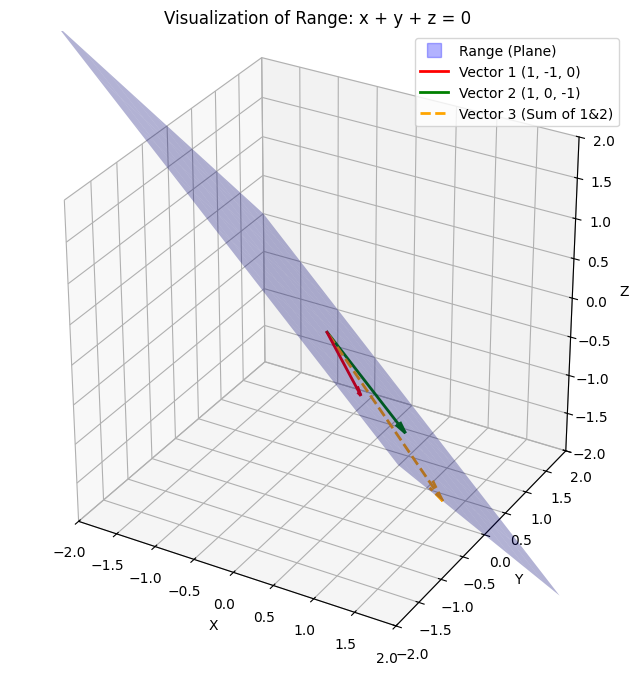

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 設定圖形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 1. 繪製平面 x + y + z = 0
# 改寫為 z = -x - y
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
Z = -X - Y

# 畫出半透明的藍色平面 (代表矩陣 A, B, C 的 Range)
surf = ax.plot_surface(X, Y, Z, alpha=0.3, color='blue', label='Plane x+y+z=0')

# 2. 繪製向量 (矩陣 A 的行向量)
# 起點都是原點 (0,0,0)
origin = [0, 0, 0]

# 向量 c1 (1, -1, 0) -> 紅色
ax.quiver(0, 0, 0, 1, -1, 0, color='red', arrow_length_ratio=0.1, linewidth=2, label='Column 1 (Matrix A)')

# 向量 c2 (1, 0, -1) -> 綠色
ax.quiver(0, 0, 0, 1, 0, -1, color='green', arrow_length_ratio=0.1, linewidth=2, label='Column 2 (Matrix A)')

# 3. 繪製矩陣 B 的第三個向量 (相依向量)
# 向量 c3 (2, -1, -1) -> 橘色虛線
ax.quiver(0, 0, 0, 2, -1, -1, color='orange', linestyle='--', arrow_length_ratio=0.1, linewidth=2, label='Column 3 (Matrix B)')

# 設定座標軸標籤
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Visualization of Range: x + y + z = 0')

# 設定顯示範圍
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

# 為了讓比例正確 (不然平面看起來會歪掉)
ax.set_box_aspect([1,1,1])

# 加上圖例 (由於 plot_surface 不支援自動圖例，這裡做一個手動的 workaround)
import matplotlib.lines as mlines
blue_plane = mlines.Line2D([], [], color='blue', alpha=0.3, marker='s', linestyle='None', markersize=10, label='Range (Plane)')
red_arrow = mlines.Line2D([], [], color='red', linewidth=2, label='Vector 1 (1, -1, 0)')
green_arrow = mlines.Line2D([], [], color='green', linewidth=2, label='Vector 2 (1, 0, -1)')
orange_arrow = mlines.Line2D([], [], color='orange', linestyle='--', linewidth=2, label='Vector 3 (Sum of 1&2)')

ax.legend(handles=[blue_plane, red_arrow, green_arrow, orange_arrow])

plt.show()

In [13]:
import plotly.graph_objects as go
import numpy as np

# --- 1. 準備數據 ---

# 定義平面 x + y + z = 0 (即 z = -x - y)
range_val = 3
x = np.linspace(-range_val, range_val, 50)
y = np.linspace(-range_val, range_val, 50)
X, Y = np.meshgrid(x, y)
Z = -X - Y

# 定義向量
# 原點
origin = [0, 0, 0]

# 矩陣 A 的兩個獨立向量 (紅色 & 綠色)
v1 = np.array([1, -1, 0])
v2 = np.array([1, 0, -1])

# 矩陣 B 的相依向量 (v1 + v2) (橘色)
v3 = v1 + v2  # 結果應為 [2, -1, -1]

# --- 2. 建立繪圖物件 ---
fig = go.Figure()

# A. 畫出半透明平面 (藍色)
fig.add_trace(go.Surface(
    z=Z, x=X, y=Y,
    colorscale=[[0, 'lightblue'], [1, 'blue']],
    opacity=0.5,
    showscale=False,
    name='Plane x+y+z=0'
))

# 輔助函式：畫向量箭頭
def add_vector(fig, vec, color, name):
    fig.add_trace(go.Scatter3d(
        x=[0, vec[0]],
        y=[0, vec[1]],
        z=[0, vec[2]],
        mode='lines+markers',
        marker=dict(size=4, color=color),
        line=dict(color=color, width=5),
        name=name
    ))
    # 加一個圓錐體在末端模擬箭頭 (由 Scatter3d 的 marker 代替，簡單呈現)

# B. 畫出向量
add_vector(fig, v1, 'red', 'Vector 1 (A)')
add_vector(fig, v2, 'green', 'Vector 2 (A)')
add_vector(fig, v3, 'orange', 'Vector 3 (B, dependent)')

# --- 3. 設定版面與互動功能 ---
fig.update_layout(
    title='Interactive Matrix Range: x + y + z = 0',
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis',
        # 設定比例固定，才不會看起來變形
        aspectmode='data' 
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

# 顯示圖表
fig.show()